# Wine quality detection
## Group 4:
* Allievi Mauro 4900025
* Di Ruzza Filippo 4900433
* Bufalari Gregorio 4900257
* Bonetti Riccardo 4902570
* Mapelli Luigi Alessandro 4900011
* Cerasani Nevro 4900202

# The project

This is a list of the step we followed to perform the analysis:


1. Dataset acquisition
2. Data visualization
3. Variable selection and data splitting

#### Machine learning on 7 classes:
4. Logistic regression
5. Decision Tree
6. Random forest
7. Gradient boosting
8. Feed forward neural network
9. Model comparison

#### Machine learning on 3 classes:

10. Class reduction
11. Logistic regression
12. Decision Tree
13. Random forest
14. Gradient boosting
15. Feed forward Neaural Network
16. Ensemble model
17. Model comparison

#### Conclusion and future improvements

# 1. Dataset acquisition

At first we load the dataset and check for NA's and duplicates.

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors

In [126]:
df1 = pd.read_csv('WineQuality.csv')

In [127]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            6497 non-null   int64  
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
 13  type                  6497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 710.7+ KB


In [128]:
df1.describe()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,2042.535632,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1436.926393,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,812.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,1649.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,3273.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,4897.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [129]:
df1.isnull().sum()

Unnamed: 0              0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [130]:
df1.duplicated().sum()

0

The dataset is clean. We can go on and perform data visualization:

# 2. Data visualization

In [131]:
df1.columns

Index(['Unnamed: 0', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'type'],
      dtype='object')

### 'Unnamed: 0'

The first thing to do is to erase the first column, which is the index:

In [132]:
print('The different values of the column Unnamed: 0 is:',   len(df1['Unnamed: 0'].unique()))

df=df1.drop('Unnamed: 0',axis=1)

The different values of the column Unnamed: 0 is: 4898


### Quality

Then i want to change the name of the target from 'quality' to 'Y' and visualize it:

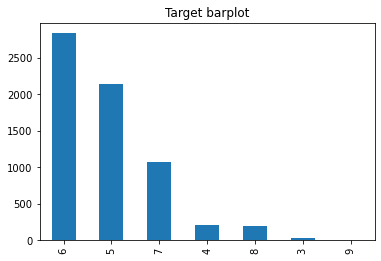

In [133]:
df = df.rename(columns={'quality': 'Y'})
df['Y'].value_counts().plot(kind='bar')
plt.title('Target barplot');

From the plot we can say that we are in a multiclass classification setting: our target is composed by 7 different categories, where 3 is the minimum value (bad quality) and 9 is the maximum value (best quality). The bad news is that the target is unbalanced, especially regarding the classes 3 and 9. For the moment we don't mind about it and continue our data visualization. Later we'll try to reduce the number of the classes. 

### Distribution of the covariates

Here is the plot of the distribution of the covariates:

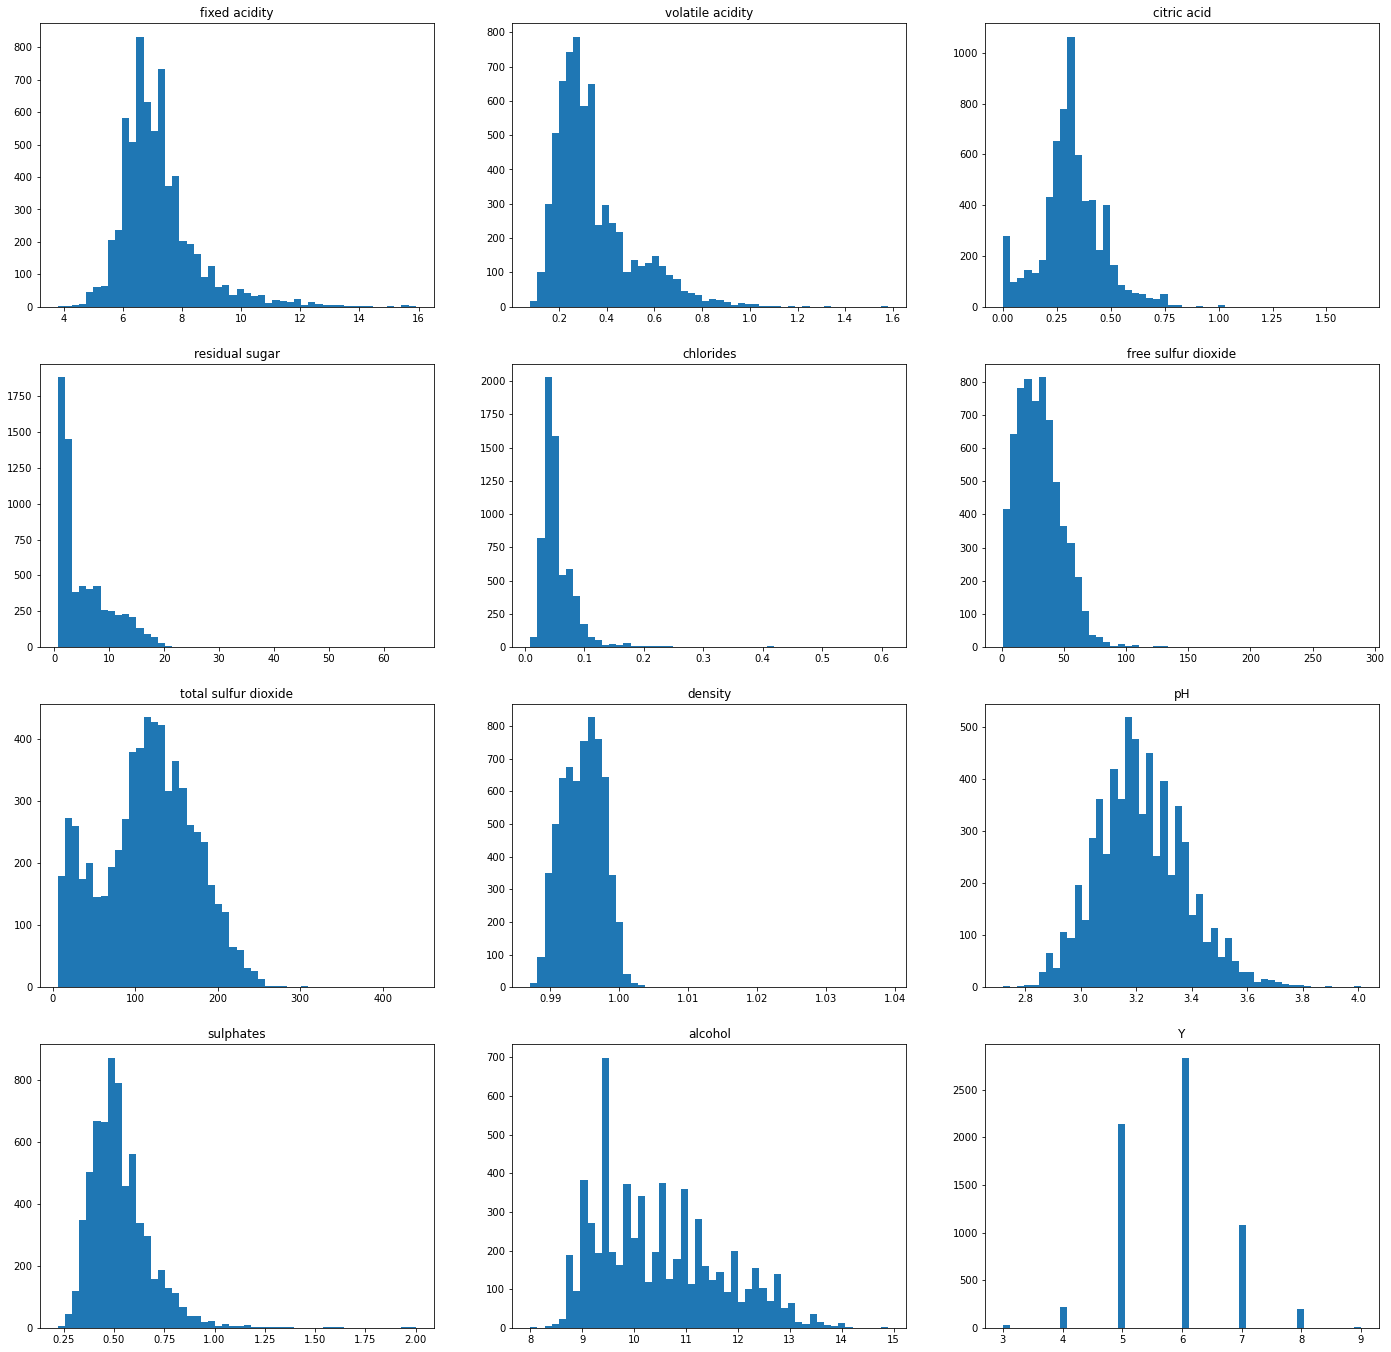

In [134]:
fig, axs = plt.subplots(4,3,figsize=(24,24))
i=0
j=0
for col in df.columns:
    try:
        axs[j,i].hist(df[col],bins=50)
        axs[j,i].set_title(col)
        i+=1
        if i==3:
            i=0
            j+=1
    except:
        continue

As you can see the distribution of the covariates is good except for the fact that most of them have long tail on the right side. It seems that they are gamma-distribuited.

### Type

Type is the only non-numerical variable. So we need to encod it:

In [135]:
df = df.rename(columns={'type': 'wine_type'})
wine_type = {'wine_type': {'white':0,
                           'red':1}}
df = df.replace(wine_type)

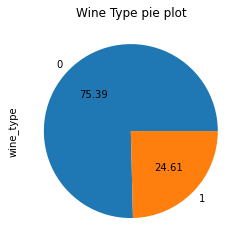

In [136]:
df['wine_type'].value_counts().plot(kind='pie',autopct='%.2f')
plt.title('Wine Type pie plot');

### Boxplot of all the variables

Here is the boxplot of the variables with respect to the target Y:

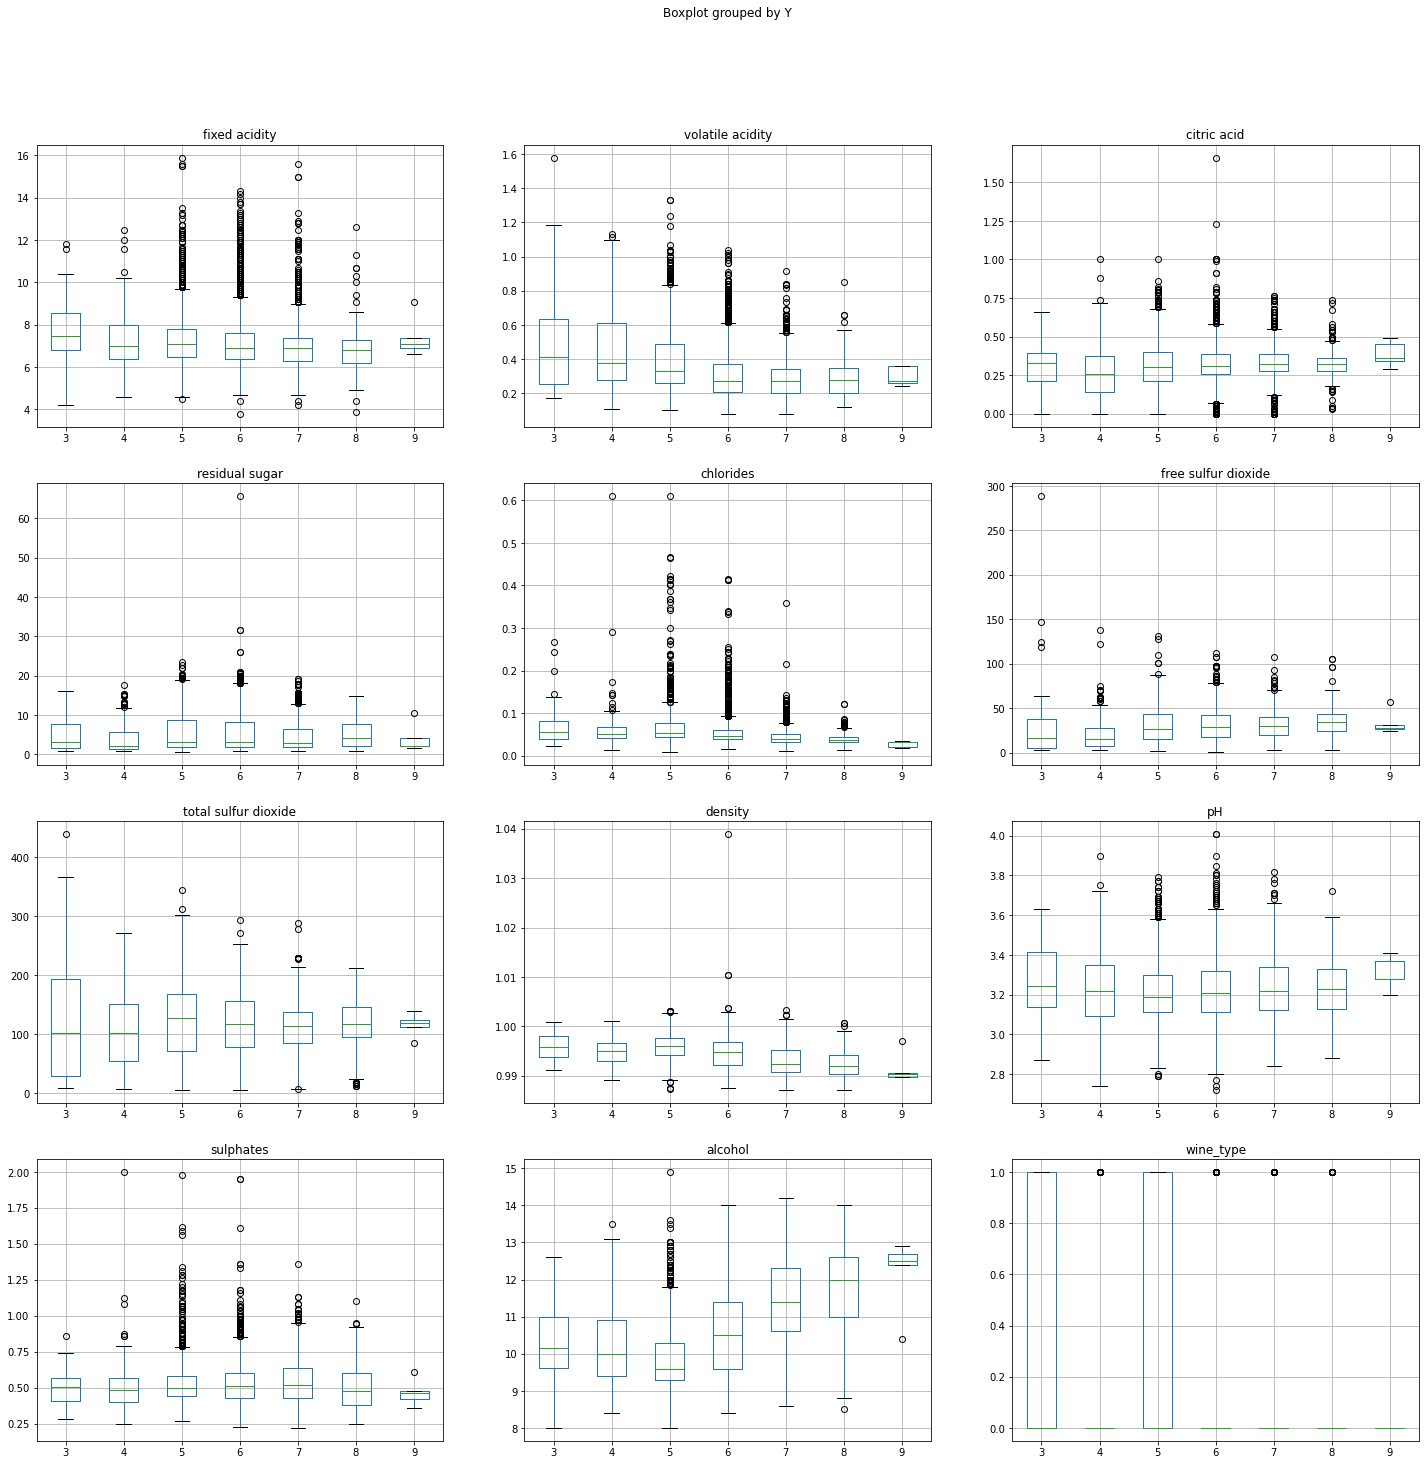

In [137]:
columns=df.drop(['Y'],axis=1).columns
fig, axs = plt.subplots(4,3,figsize=(24,24))
i=0
j=0
for col in columns:
    df.boxplot(column=[col],by='Y',ax=axs[j,i])
    axs[j,i].set_title(col)
    axs[j,i].set(xlabel='')
    i+=1
    if i==3:
        i=0
        j+=1
    ;

In [138]:
df.pivot_table(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'Y', 'wine_type'],'Y')

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,volatile acidity,wine_type
Y,,,,,,,,,,,,
3,10.215000,0.077033,0.281000,0.995744,7.853333,39.216667,3.257667,5.140000,0.506333,122.033333,0.517000,0.333333
4,10.180093,0.060056,0.272315,0.994833,7.288889,20.636574,3.231620,4.153704,0.505648,103.432870,0.457963,0.245370
5,9.837783,0.064666,0.307722,0.995849,7.326801,30.237371,3.212189,5.804116,0.526403,120.839102,0.389614,0.318522
6,10.587553,0.054157,0.323583,0.994558,7.177257,31.165021,3.217726,5.549753,0.532549,115.410790,0.313863,0.224965
7,11.386006,0.045272,0.334764,0.993126,7.128962,30.422150,3.228072,4.731696,0.547025,108.498610,0.288800,0.184430
8,11.678756,0.041124,0.332539,0.992514,6.835233,34.533679,3.223212,5.382902,0.512487,117.518135,0.291010,0.093264
9,12.180000,0.027400,0.386000,0.991460,7.420000,33.400000,3.308000,4.120000,0.466000,116.000000,0.298000,0.000000


From the boxplot we can say that the correlation between the covariates and the target Y is not visible, except fot 'alcohol'. The proof is given by the pivot table.

# 3. Variable selection and data splitting

Now we can start investigating the correlation between the variables.

In [139]:
from matplotlib import cm
viridis = cm.get_cmap('viridis', 256)
def corr_heatmap(x):
    correlations = x.corr()
    plt.figure(figsize=(9, 7))
    sns.heatmap(correlations,center=0,cmap=viridis)
    plt.title("Heatmap of feature's correlation")
    plt.show()

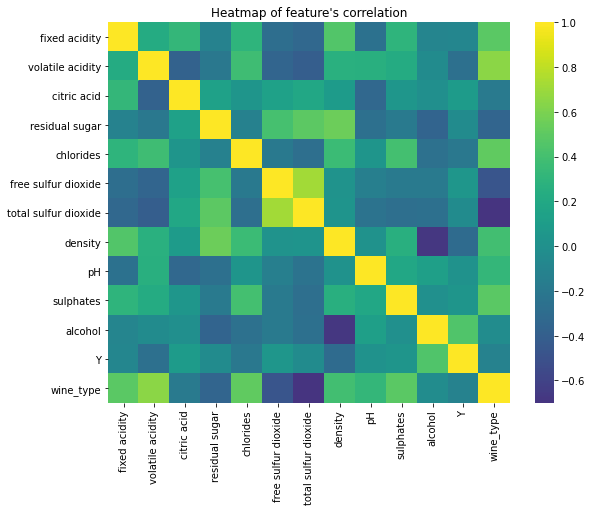

In [140]:
corr_heatmap(df)

The highest correlation is between 'free sulfur dioxide' and 'total sulfur dioxide'. Moreover, total sulfur is also correlated with wine_type:

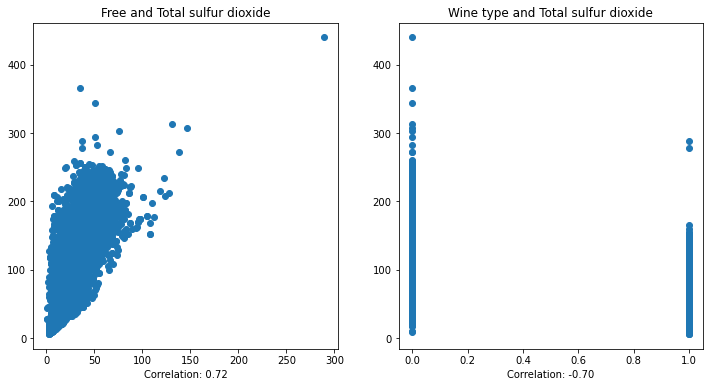

In [141]:
sup1='Correlation: {0:.2f}'.format(df.corr()['free sulfur dioxide']['total sulfur dioxide'])
sup2='Correlation: {0:.2f}'.format(df.corr()['total sulfur dioxide']['wine_type'])
columns=df.drop(['Y'],axis=1).columns
fig, axs = plt.subplots(1,2,figsize=(12,6))
axs[0].scatter(df['free sulfur dioxide'],df['total sulfur dioxide'])
axs[0].set_title('Free and Total sulfur dioxide')
axs[0].set(xlabel=sup1)
axs[1].scatter(df['wine_type'],df['total sulfur dioxide'])
axs[1].set_title('Wine type and Total sulfur dioxide')
axs[1].set(xlabel=sup2);

Since Total sulfur is present in booth, we remove it from the analysis.

In [142]:
df.drop('total sulfur dioxide',axis=1,inplace=True)

The second problem is the following:

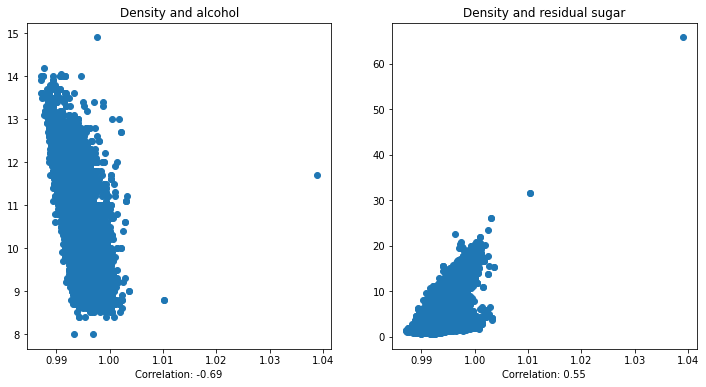

In [143]:
sup1='Correlation: {0:.2f}'.format(df.corr()['density']['alcohol'])
sup2='Correlation: {0:.2f}'.format(df.corr()['density']['residual sugar'])
columns=df.drop(['Y'],axis=1).columns
fig, axs = plt.subplots(1,2,figsize=(12,6))
axs[0].scatter(df['density'],df['alcohol'])
axs[0].set_title('Density and alcohol')
axs[0].set(xlabel=sup1)
axs[1].scatter(df['density'],df['residual sugar'])
axs[1].set_title('Density and residual sugar')
axs[1].set(xlabel=sup2);

For the same reason we removed density.

In [144]:
df.drop('density',axis=1,inplace=True)

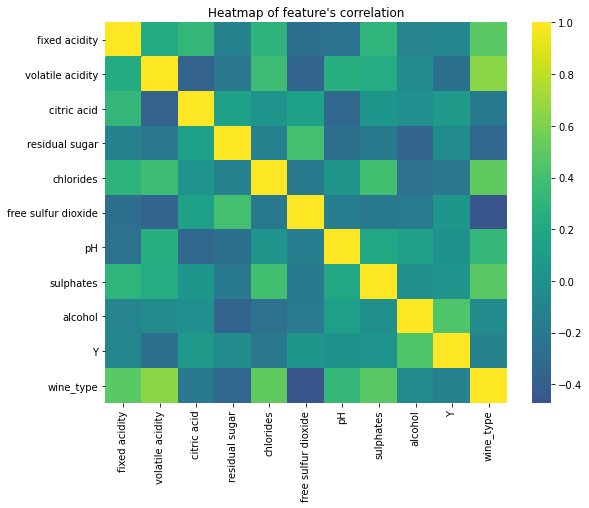

In [145]:
corr_heatmap(df)

The last variable to be romved is wine_type, because is highly correlated with the most of the variables.

In [147]:
df.corr()['wine_type']

fixed acidity          0.486740
volatile acidity       0.653036
citric acid           -0.187397
residual sugar        -0.348821
chlorides              0.512678
free sulfur dioxide   -0.471644
pH                     0.329129
sulphates              0.487218
alcohol               -0.032970
Y                     -0.119323
wine_type              1.000000
Name: wine_type, dtype: float64

In [22]:
df.drop('wine_type',axis=1,inplace=True)

The variables are not correlated anymore. We can go on with the analysis.

### Data splitting and label binarization

Our aim is to perform a OnsVsRest classification, se we have to binarize the target. Before, we split the data in train and test and scaled them using a robust scaler which is robust with respect to the outliers.

In [23]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
y=df['Y']
x=df.drop(['Y'],axis=1)
x = pd.DataFrame(RobustScaler().fit_transform(x),columns=x.columns)

In [24]:
x_train, x_test, y_train_v, y_test_v = train_test_split(x, y, test_size=0.33, random_state=42,stratify=y)
targetnames=['class {0:.0f}'.format(x) for x in range(y_test_v.min(),y_test_v.max()+1)]

In [25]:
y_train=label_binarize(y_train_v,classes=[3,4,5,6,7,8,9])
print(x_train.shape)
print(y_train.shape)

(4352, 9)
(4352, 7)


In [26]:
y_test=label_binarize(y_test_v,classes=[3,4,5,6,7,8,9])

In [27]:
print(x_test.shape)
print(y_test.shape)

(2145, 9)
(2145, 7)


# Machine learning

To perform machine learning we'll use for the most of the times models included in sklearn. Because of this, our idea is to create e new object that automatically performs the training, print the metrics, plot the confusion matrix and the ROC curve and finally does hypertuning. The class is the following. You can find all the informatio you need to understand it inside of the code.

### SKlearn class:

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import multilabel_confusion_matrix,roc_auc_score, roc_curve,precision_score, classification_report,auc
import numpy as np
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

fpr_compare = {}
tpr_compare = {}
auc_compare = {}
class_3={}
class_9={}

class ModelAnalyzer:
    
    #INIZIALIZATION:
    #as input i use the model externally created, the dataset already splitted and the name of the model for 
    #plotting purposes. I saved everything as 'self' to use the data later in the defs.
    
    def __init__(self,model,model_name,x_train,x_test,y_train,y_test):
        self.model=model
        self.model_name=model_name
        self.x_train=x_train
        self.x_test=x_test
        self.y_train=y_train
        self.y_test=y_test
        self.n_classes=y_test.shape[1]
    
    #MODEL TRAINING:
    #This method allows me to train the model.
    
    def train_my_model(self):
        self.model.fit(self.x_train, self.y_train)

    #METRICS:
    #this method print some useful metrics.
    
    def print_metrics(self,targetnames,save=False):
        print(self.model_name+' report: \n',classification_report(self.y_test, self.model.predict(self.x_test),
                                     zero_division=0,target_names=targetnames))
        
        if save:
            cl_rep=classification_report(self.y_test, self.model.predict(self.x_test),
                                         zero_division=0,target_names=targetnames,output_dict=True)
            class_3[self.model_name]=cl_rep['class 3']
            class_9[self.model_name]=cl_rep['class 9']
    
    #CONFUSION MATRIX
    #this method plot a confusion matrix that is the sum of all the confusion matrix obtained for each class.
    #i decided to do like this because the other informations can be obtained looking at the other metrics.
    
    def plot_confusion_matrix(self):
        cm=multilabel_confusion_matrix(self.y_test, self.model.predict(self.x_test))
        new_cm=np.array([[0,0],[0,0]])    
        for n in range (cm.shape[0]):
            for i in range(2):
                for j in range(2):
                    new_cm[i,j]+=cm[n,i,j]       #here i create my new array 
        fig, ax = plt.subplots(figsize=(8, 8))   #here i create the plot
        ax.imshow(new_cm/(self.n_classes*self.y_test.shape[0]),cmap=plt.cm.Blues,interpolation='nearest')
        ax.grid(False)
        ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
        ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
        ax.set_ylim(1.5, -0.5)
        for i in range(2):                       #this is used to put the numbers in the box
            for j in range(2):
                text=float(new_cm[i, j]/(self.n_classes*self.y_test.shape[0]))
                ax.text(j, i, '{0:.2f}%'.format(text*100), ha='center', va='center', color='red',fontsize=18)
        plt.suptitle(self.model_name+': Confusion matrix',fontsize=20)
        plt.title('0-0 and 1-1 means right, 0-1 and 1-0 means wrong',fontsize=14);
        
    #ROC CURVE
    #this code allows me to obtain the AUC score for each class and plot the relative roc curve.
    #Moreover i computed the micro average auc and used it as metrics to compare the models
    #performances. 
        
    def plot_roc_curve(self):
        
        #compute predict probabilities
        probs = self.model.predict_proba(self.x_train)
        probs_test = self.model.predict_proba(self.x_test)        
        
        #Micro average ROC curve:
        #compute fpr, tpr e auc;
        fpr_micro,tpr_micro, _ = roc_curve(self.y_test.ravel(), probs_test.ravel())
        auc_micro = auc(fpr_micro, tpr_micro)
        
        
        #Save micro auc for comparing the models
        fpr_compare[self.model_name]=fpr_micro
        tpr_compare[self.model_name]=tpr_micro
        auc_compare[self.model_name]=auc_micro
        print('Micro average AUC score:{0:0.4f}'.format(auc_micro))


        
        #ROC curve for every class:
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(self.n_classes):
            fpr[i], tpr[i], _ = roc_curve(self.y_test[:, i], probs_test[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
        
        # Plot all ROC curves
        plt.figure(figsize=[10,10])
        colors = ['red','orange','yellow','green','blue','indigo','purple']
        for i, color in zip(range(self.n_classes), colors):
            plt.plot(fpr[i], tpr[i], color=color,
                     label='ROC curve of {0} (area = {1:0.2f})'
                     ''.format(targetnames[i], roc_auc[i]))

        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([-0.01, 1.0])
        plt.ylim([0.0, 1.02])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(self.model_name+': ROC curve for each class')
        plt.legend(loc="lower right")
        plt.show()
        
    #HYPERTUNING!
    #With this code i can hypertune the models. It has been hard to implement because of the OneVSRest:
    #to pass the params grid to the RandomizedSearchCV function it tooks me a lot of times and trials to 
    #understand that the best way was to use the 'estimator__' keyword instead of trying to use 
    #self.model.estimator as estimator. 
    
    def hypertune(self,param_distribution,n_iter=100,cv=3,random=False):
        if random:
            HT = RandomizedSearchCV(estimator = self.model, param_distributions = param_distribution, 
                                           n_iter = n_iter, cv = cv, verbose=1, random_state=420, n_jobs = -1)
        else:
            HT = GridSearchCV(estimator = self.model, param_grid = param_distribution, 
                                        cv = cv, verbose=1, n_jobs = -1)        
        HT.fit(self.x_train, self.y_train)
        print('Best params: ',HT.best_params_)
        best = ModelAnalyzer(self.model.set_params(**HT.best_params_),self.model_name,
                             self.x_train,self.x_test,self.y_train,self.y_test)
        best.train_my_model()
        return best
    
    #Only for Random Forest
    def feat_impo(self):
        if self.model_name=='Random Forest':
            self.model.estimator.fit(self.x_train,self.y_train,)
        return(self.model.estimator.feature_importances_)    

# Deep learning

For the models implemented in keras we created the following class. The logic is the same as the class with sklearn, except that is not possibile to use the predict method as before but we need to use predict_proba and convert it.

### Keras class

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
class NNAnalyzer:
    
    def __init__(self,nn_model,model_name,x_train,x_test,y_train,y_test):
        self.model=nn_model
        self.x_train=x_train
        self.x_test=x_test
        self.y_train=y_train
        self.y_test=y_test
        self.model_name=model_name
        print(self.model.summary())
        
    def train_my_model(self,batch_size,epochs,early_stop,model_checkpoint):
        self.model.fit(self.x_train.values, self.y_train, validation_data=(self.x_test, self.y_test),
                       batch_size=batch_size,epochs=epochs,callbacks=[early_stop,model_checkpoint])
        
    def plot_model(self):
        fig, axs = plt.subplots(2, figsize=(15,10))
        axs[0].plot(self.model.history.history["val_accuracy"], label="Validation accuracy")
        axs[0].plot(self.model.history.history["accuracy"], label="Training accuracy")
        axs[0].set_title('Accuracy: train and test')
        axs[0].set_xlabel("Epoch")
        axs[0].set_ylabel("Accuracy")
        axs[0].legend()

        axs[1].plot(self.model.history.history["val_loss"], label="Validation loss")
        axs[1].plot(self.model.history.history["loss"], label="Training loss")
        axs[1].set_title('Loss: train and test')
        axs[1].set_xlabel("Epoch")
        axs[1].set_ylabel("Loss")
        axs[1].legend()
    
    def print_metrics(self,classes,save=False):
        ffw_pred=self.model.predict_proba(self.x_test)
        ffw_pred_01=[]
        for row in ffw_pred:
            ffw_pred_01.append(np.argmax(row))
        y_pred=label_binarize(ffw_pred_01,classes=classes) #conversion of predict_proba
        print('Classification report for'+self.model_name,
              classification_report(self.y_test, y_pred,zero_division=0,target_names=targetnames))
        if save:
            cl_rep=classification_report(self.y_test, y_pred,zero_division=0,target_names=targetnames,output_dict=True)
            class_3[self.model_name]=cl_rep['class 3']
            class_9[self.model_name]=cl_rep['class 9']
            
        self.y_pred=y_pred

    def plot_confusion_matrix(self):
        cm=multilabel_confusion_matrix(self.y_test, self.y_pred)
        new_cm=np.array([[0,0],[0,0]])    
        for n in range (cm.shape[0]):
            for i in range(2):
                for j in range(2):
                    new_cm[i,j]+=cm[n,i,j]       #here i create my new array 
        fig, ax = plt.subplots(figsize=(8, 8))   #here i create the plot
        ax.imshow(new_cm/(self.y_test.shape[1]*self.y_test.shape[0]),cmap=plt.cm.Blues,interpolation='nearest')
        ax.grid(False)
        ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
        ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
        ax.set_ylim(1.5, -0.5)
        for i in range(2):                       #this is used to put the numbers in the box
            for j in range(2):
                text=float(new_cm[i, j]/(self.y_test.shape[1]*self.y_test.shape[0]))
                ax.text(j, i, '{0:.2f}%'.format(text*100), ha='center', va='center', color='red',fontsize=18)
        plt.suptitle(self.model_name+' Confusion matrix',fontsize=20)
        plt.title('0-0 and 1-1 means right, 0-1 and 1-0 means wrong',fontsize=14)
        plt.show();


    def plot_roc_curve(self):
        probs_test = self.model.predict_proba(self.x_test) 

        fpr_micro,tpr_micro, _ = roc_curve(self.y_test.ravel(), probs_test.ravel())
        auc_micro = auc(fpr_micro, tpr_micro)

        fpr_compare[self.model_name]=fpr_micro
        tpr_compare[self.model_name]=tpr_micro
        auc_compare[self.model_name]=auc_micro
        print('Micro average AUC score:{0:0.4f}'.format(auc_micro))

        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(self.y_test.shape[1]):
            fpr[i], tpr[i], _ = roc_curve(y_test[:, i], probs_test[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
        # Plot all ROC curves
        plt.figure(figsize=[10,10])
        colors = ['red','orange','yellow','green','blue','indigo','purple']
        for i, color in zip(range(self.y_test.shape[1]), colors):
            plt.plot(fpr[i], tpr[i], color=color,
                     label='ROC curve of class {0} (area = {1:0.2f})'
                     ''.format(i+3, roc_auc[i]))

        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([-0.01, 1.0])
        plt.ylim([0.0, 1.01])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(self.model_name+': ROC curve for each class')
        plt.legend(loc="lower right")
        plt.show()   
    

    
#This is the function we use for comparing the models on the micro Auc score.
def model_comparison():
    plt.figure(figsize=[10,10])
    col = ['red','orange','yellow','green','blue','indigo','purple']
    for mod, col in zip(auc_compare.keys(), col):
        plt.plot(fpr_compare[mod], tpr_compare[mod], color=col,
                 label='Micro AUC for {0} (area = {1:0.2f})'.format(mod, auc_compare[mod]))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.01])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve for Model Comparison')
    plt.legend(loc="lower right")
    plt.show()

Using TensorFlow backend.


# 4. Logistic regression:

In [30]:
lr_model = OneVsRestClassifier(LogisticRegression())
LogRegression=ModelAnalyzer(lr_model,'Logistic Regression',x_train,x_test,y_train,y_test)

In [31]:
LogRegression.train_my_model()
random_grid = {'estimator__penalty': ['l1','l2','elasticnet', 'none'], #defaul l2
               'estimator__C' : np.logspace(-4, 1, 40)} #default 1

LogRegression=LogRegression.hypertune(random_grid)
LogRegression.print_metrics(targetnames,save=True)

Fitting 3 folds for each of 160 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 473 out of 480 | elapsed:   22.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:   23.2s finished
/opt/anaconda3/envs/Progetto/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/envs/Progetto/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/envs/Progetto/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Se

Best params:  {'estimator__C': 0.0001, 'estimator__penalty': 'none'}


/opt/anaconda3/envs/Progetto/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/envs/Progetto/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


Logistic Regression report: 
               precision    recall  f1-score   support

     class 3       0.00      0.00      0.00        10
     class 4       0.00      0.00      0.00        71
     class 5       0.61      0.48      0.54       706
     class 6       0.51      0.24      0.32       936
     class 7       0.48      0.13      0.21       356
     class 8       0.00      0.00      0.00        64
     class 9       0.00      0.00      0.00         2

   micro avg       0.56      0.28      0.38      2145
   macro avg       0.23      0.12      0.15      2145
weighted avg       0.51      0.28      0.35      2145
 samples avg       0.27      0.28      0.27      2145



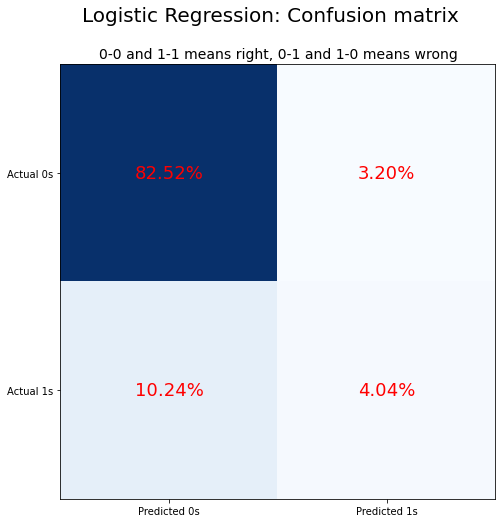

In [32]:
LogRegression.plot_confusion_matrix()

Micro average AUC score:0.8925


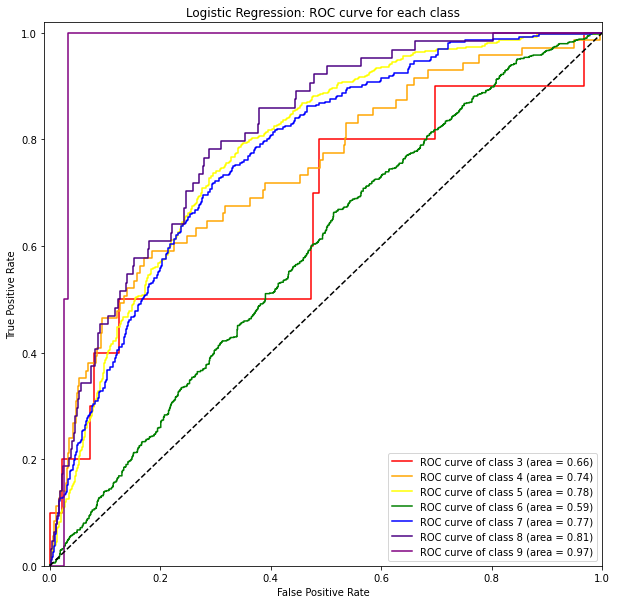

In [33]:
LogRegression.plot_roc_curve()

# 5. Decision tree

In [34]:
dt_model = OneVsRestClassifier(DecisionTreeClassifier())
DecisionTree=ModelAnalyzer(dt_model,'Decision Tree',x_train,x_test,y_train,y_test)

In [35]:
DecisionTree.train_my_model()
random_grid = {'estimator__criterion': ['gini', 'entropy'], #default gini
               'estimator__max_depth': [int(x) for x in np.linspace(40, 80, 15)], #default none
               'estimator__min_samples_split' : [1,2,3,4,5], #default 2
               'estimator__max_features' : [1,2,3,4,5,6]} #default sqrt(9)=3

DecisionTree=DecisionTree.hypertune(random_grid)
DecisionTree.print_metrics(targetnames,save=True)

Fitting 3 folds for each of 900 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 668 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done 1668 tasks      | elapsed:   48.2s
[Parallel(n_jobs=-1)]: Done 2700 out of 2700 | elapsed:  1.3min finished


Best params:  {'estimator__criterion': 'gini', 'estimator__max_depth': 48, 'estimator__max_features': 3, 'estimator__min_samples_split': 2}
Decision Tree report: 
               precision    recall  f1-score   support

     class 3       0.33      0.10      0.15        10
     class 4       0.21      0.23      0.22        71
     class 5       0.63      0.67      0.65       706
     class 6       0.64      0.63      0.64       936
     class 7       0.50      0.51      0.51       356
     class 8       0.31      0.33      0.32        64
     class 9       0.00      0.00      0.00         2

   micro avg       0.59      0.60      0.59      2145
   macro avg       0.37      0.35      0.35      2145
weighted avg       0.59      0.60      0.59      2145
 samples avg       0.53      0.60      0.55      2145



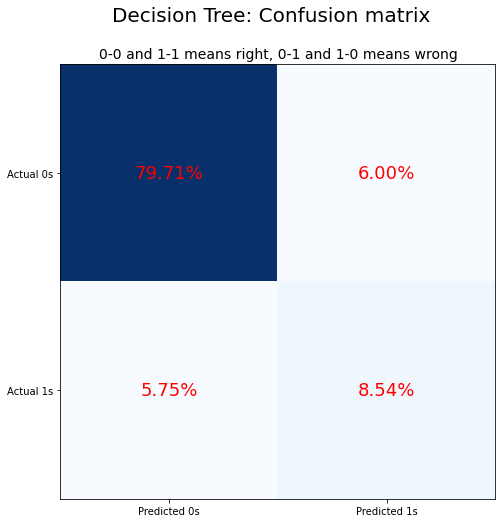

In [36]:
DecisionTree.plot_confusion_matrix()

Micro average AUC score:0.7638


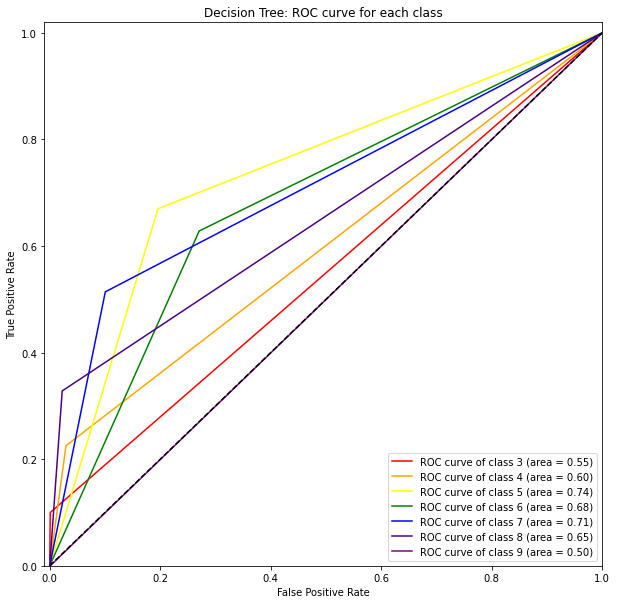

In [37]:
DecisionTree.plot_roc_curve()

# 6. Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf_model=OneVsRestClassifier(RandomForestClassifier())
RandomForest=ModelAnalyzer(rf_model,'Random Forest',x_train,x_test,y_train,y_test)

In [39]:
RandomForest.train_my_model()
random_grid = {'estimator__criterion': ['gini', 'entropy'], #default gini
               'estimator__n_estimators': [int(x) for x in np.linspace(start = 100, stop = 200, num = 5)], #default 100
               'estimator__max_features': [1,3,5], #default sqrt(9)=3
               'estimator__max_depth': [int(x) for x in np.linspace(50, 100, 3)], #default none
               'estimator__min_samples_split': [1,2,3,4]} #default 1

RandomForest=RandomForest.hypertune(random_grid,100,3,random='True')
RandomForest.print_metrics(targetnames,save=True)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 11.1min finished


Best params:  {'estimator__n_estimators': 200, 'estimator__min_samples_split': 3, 'estimator__max_features': 5, 'estimator__max_depth': 75, 'estimator__criterion': 'gini'}
Random Forest report: 
               precision    recall  f1-score   support

     class 3       0.00      0.00      0.00        10
     class 4       1.00      0.08      0.16        71
     class 5       0.73      0.69      0.71       706
     class 6       0.70      0.61      0.65       936
     class 7       0.79      0.43      0.56       356
     class 8       0.86      0.30      0.44        64
     class 9       0.00      0.00      0.00         2

   micro avg       0.73      0.58      0.64      2145
   macro avg       0.58      0.30      0.36      2145
weighted avg       0.74      0.58      0.63      2145
 samples avg       0.57      0.58      0.58      2145



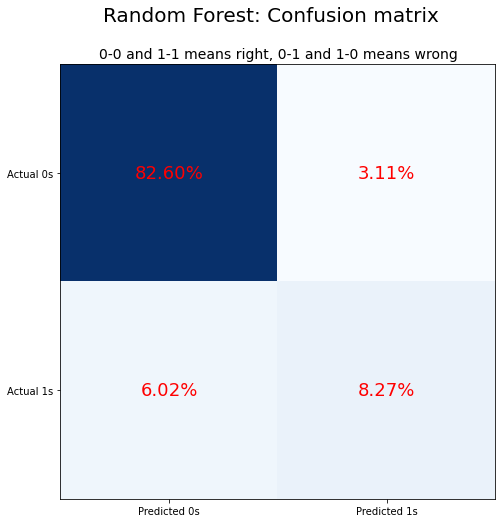

In [40]:
RandomForest.plot_confusion_matrix()

Micro average AUC score:0.9386


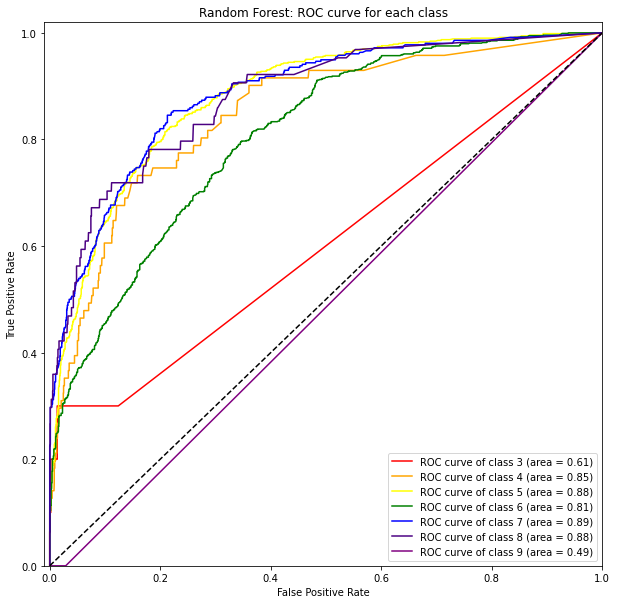

In [41]:
RandomForest.plot_roc_curve()

# 7. Gradient Boosting

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = OneVsRestClassifier(GradientBoostingClassifier())
GradientBoosting=ModelAnalyzer(gb_model,'Gradient Boosting',x_train,x_test,y_train,y_test)

In [43]:
GradientBoosting.train_my_model()
random_grid = {'estimator__learning_rate' : np.linspace(0.01, 0.1, 5), #default 0.1
               'estimator__n_estimators': [50,75,100,125,150], #default 100
               'estimator__min_samples_split' : [1,2,3,4,5], #default 2
              }
GradientBoosting=GradientBoosting.hypertune(random_grid)
GradientBoosting.print_metrics(targetnames,save=True)

Fitting 3 folds for each of 125 candidates, totalling 375 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 375 out of 375 | elapsed:  6.1min finished


Best params:  {'estimator__learning_rate': 0.01, 'estimator__min_samples_split': 5, 'estimator__n_estimators': 150}
Gradient Boosting report: 
               precision    recall  f1-score   support

     class 3       0.00      0.00      0.00        10
     class 4       1.00      0.01      0.03        71
     class 5       0.66      0.44      0.53       706
     class 6       0.57      0.35      0.43       936
     class 7       0.00      0.00      0.00       356
     class 8       0.00      0.00      0.00        64
     class 9       0.00      0.00      0.00         2

   micro avg       0.61      0.30      0.40      2145
   macro avg       0.32      0.12      0.14      2145
weighted avg       0.50      0.30      0.36      2145
 samples avg       0.30      0.30      0.30      2145



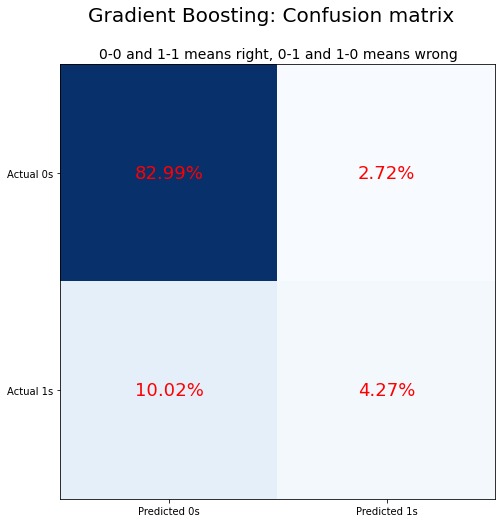

In [44]:
GradientBoosting.plot_confusion_matrix()

Micro average AUC score:0.9001


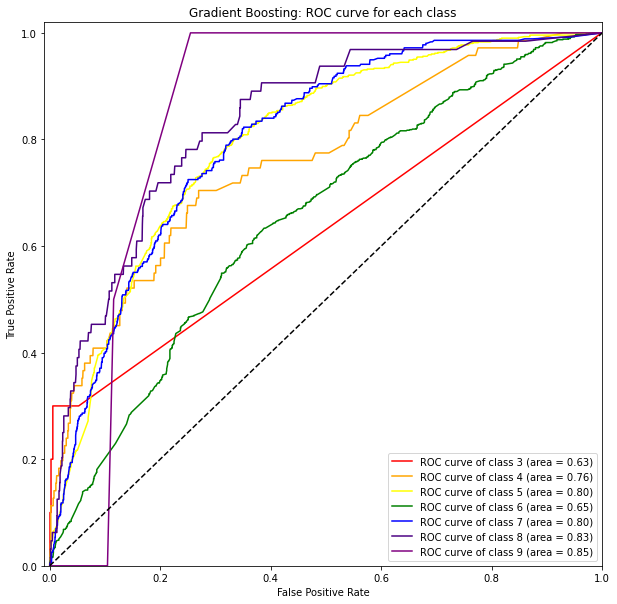

In [45]:
GradientBoosting.plot_roc_curve()

# 8. Neural Network

In [46]:
ffw = Sequential()
ffw.add(Dense(1000, activation = "relu",input_shape=(9,),kernel_regularizer=l1_l2(.0001)))
ffw.add(Dense(500, activation = "relu"))
ffw.add(Dense(250, activation = "relu"))
ffw.add(Dense(125, activation = "relu"))
ffw.add(Dropout(.5))
ffw.add(Dense(7, activation="sigmoid"))
ffw.compile(loss="binary_crossentropy", optimizer='Adam', metrics=['accuracy',])

In [47]:
NNet=NNAnalyzer(ffw,'Feed Forward NN',x_train,x_test,y_train,y_test)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              10000     
_________________________________________________________________
dense_2 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_3 (Dense)              (None, 250)               125250    
_________________________________________________________________
dense_4 (Dense)              (None, 125)               31375     
_________________________________________________________________
dropout_1 (Dropout)          (None, 125)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 882       
Total params: 668,007
Trainable params: 668,007
Non-trainable params: 0
________________________________________________

In [48]:
mc = ModelCheckpoint('model_1.h5', monitor='val_loss', mode='min', save_best_only=True, verbose=1)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
NNet.train_my_model(16,100,es,mc)

Train on 4352 samples, validate on 2145 samples
Epoch 1/100
4352/4352 [==============================] - 13s 3ms/step - loss: 0.3421 - accuracy: 0.8515 - val_loss: 0.2781 - val_accuracy: 0.8690

Epoch 00001: val_loss improved from inf to 0.27813, saving model to model_1.h5
Epoch 2/100
4352/4352 [==============================] - 31s 7ms/step - loss: 0.2864 - accuracy: 0.8596 - val_loss: 0.2729 - val_accuracy: 0.8640

Epoch 00002: val_loss improved from 0.27813 to 0.27293, saving model to model_1.h5
Epoch 3/100
4352/4352 [==============================] - 16s 4ms/step - loss: 0.2812 - accuracy: 0.8646 - val_loss: 0.2693 - val_accuracy: 0.8720

Epoch 00003: val_loss improved from 0.27293 to 0.26929, saving model to model_1.h5
Epoch 4/100
4352/4352 [==============================] - 13s 3ms/step - loss: 0.2761 - accuracy: 0.8655 - val_loss: 0.2735 - val_accuracy: 0.8640

Epoch 00004: val_loss did not improve from 0.26929
Epoch 5/100
4352/4352 [==============================] - 11s 2ms/ste

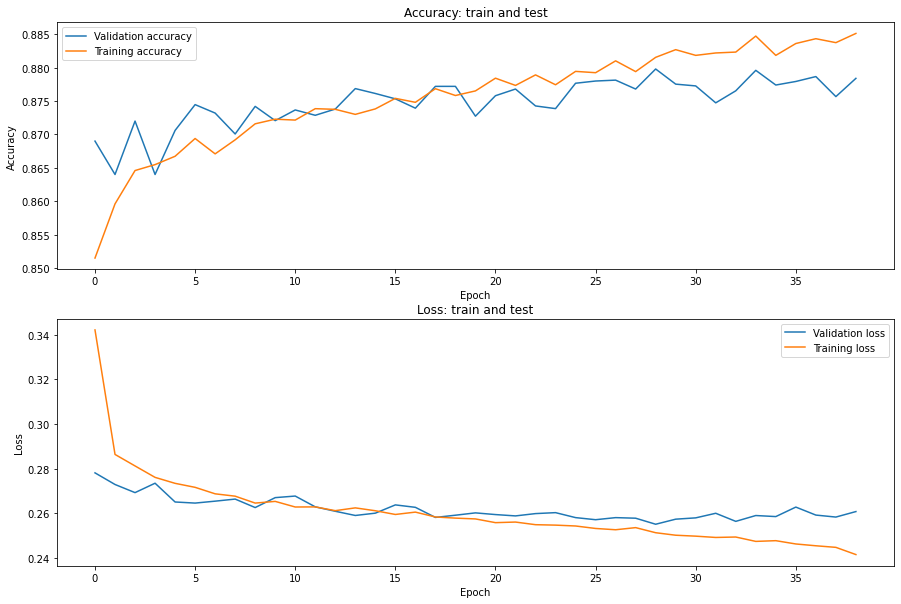

In [49]:
NNet.plot_model()

In [50]:
NNet.print_metrics(save=True,classes=[0,1,2,3,4,5,6])

Classification report forFeed Forward NN               precision    recall  f1-score   support

     class 3       1.00      0.10      0.18        10
     class 4       0.00      0.00      0.00        71
     class 5       0.60      0.65      0.63       706
     class 6       0.54      0.68      0.60       936
     class 7       0.52      0.29      0.38       356
     class 8       0.00      0.00      0.00        64
     class 9       0.00      0.00      0.00         2

   micro avg       0.56      0.56      0.56      2145
   macro avg       0.38      0.25      0.26      2145
weighted avg       0.53      0.56      0.53      2145
 samples avg       0.56      0.56      0.56      2145



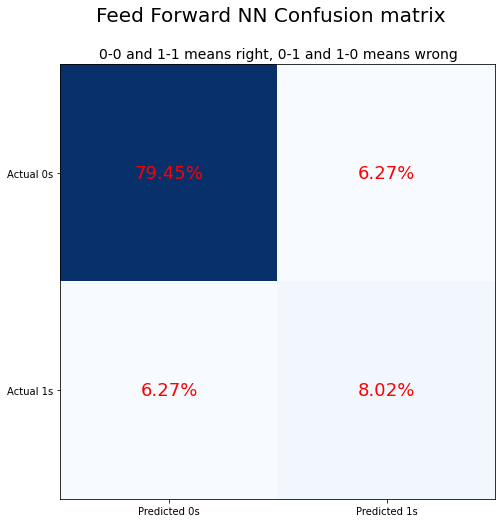

In [51]:
NNet.plot_confusion_matrix()

Micro average AUC score:0.9068


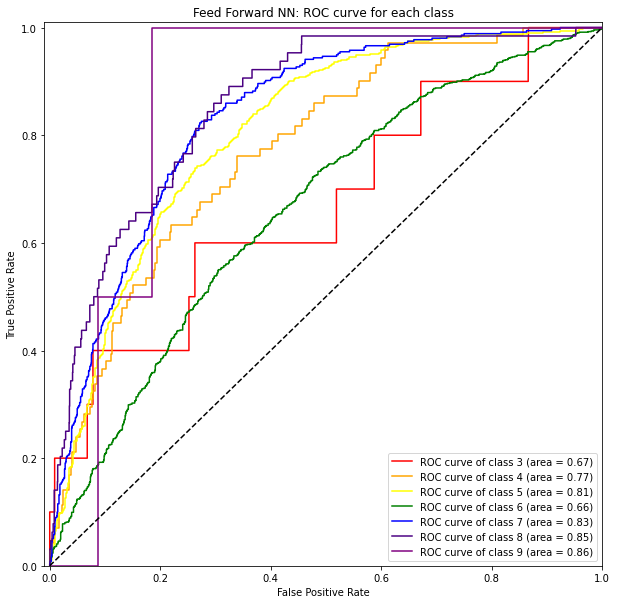

In [52]:
NNet.plot_roc_curve()

# 9. Model comparison

To compare the model's we'll use the Micro AUC score. It is a metric used for resuming the result obtained for each class by a model and is computed considering each element as a label. Basically, this means that for each observation we compare each result to the correspective y_true. Considering that we got 7 classes, for each observation in the best case we have 7 right predictions while in the worst case the right prediction are just 5. This means that it tend to overestimate. We can use it for model comparison only if we consider the same number of classes.
The following is the plot:

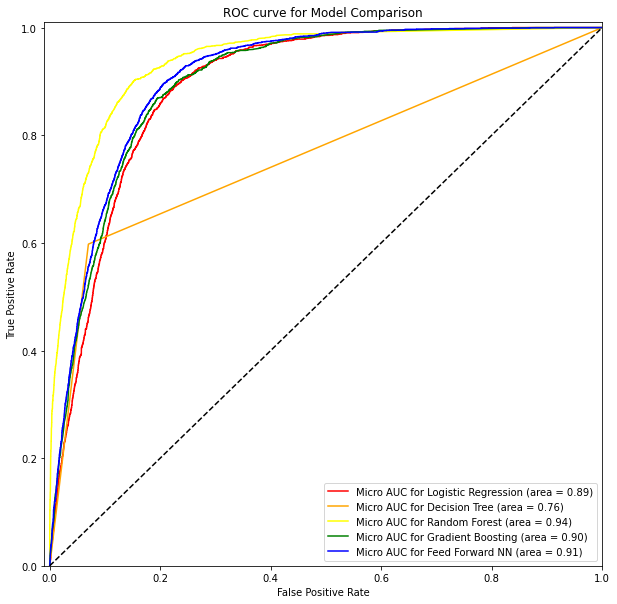

In [53]:
model_comparison()

From the plot seems that the results are good, particoularly for the random forest. However if look closer at the metrics obtained we can see a problem.

### The problem:

In [54]:
pd.DataFrame(class_3)

,Logistic Regression,Decision Tree,Random Forest,Gradient Boosting,Feed Forward NN
precision,0.0,0.333333,0.0,0.0,1.000000
recall,0.0,0.100000,0.0,0.0,0.100000
f1-score,0.0,0.153846,0.0,0.0,0.181818
support,10.0,10.000000,10.0,10.0,10.000000


In [55]:
pd.DataFrame(class_9)

,Logistic Regression,Decision Tree,Random Forest,Gradient Boosting,Feed Forward NN
precision,0.0,0.0,0.0,0.0,0.0
recall,0.0,0.0,0.0,0.0,0.0
f1-score,0.0,0.0,0.0,0.0,0.0
support,2.0,2.0,2.0,2.0,2.0


The results for the classes 9 and 3 are awful. 

The reason is simple and comes from the OneVsRest approach: since we fit one estimator for each class, we can't ask the estimator to predict when the observation belong to class 9 or not, given the fact that only 5 observations out of 6k and a half really comes from class 9. The same can be observed for class 3. 

### The solutions:

The solutions for overcome a problem like this (unbalanced target) are 4:
* Up-Sampling
This technique is based on resampling the classes with the smaller number of elements. But we can't apply it to our dataset because we'll introduce a lot of correlation between the observation: up-sampling from 5 (smallest class, 9) to 2836 (biggest class, 6) means using 500 times the same observation. 
* Down-sampling
This technique is the inverse of the previous one: instead of up-sampling the minority class we down-sample the majority class. But this technique reduces the variability of the data and the size of the sample by far and does not allow to have good results.
* Mix of up and down sampling:
One other way of getting rid of the problem is to use the previuos technique combined to up-sample the minority class and down sample the majority class. This can be a good approach but not in our case, because the difference in size between the classes 9 and 3 is too big. 
* class_weight: 'balanced'
This technique does not require to elaborate the sample but is used directly inside of the estimators. Basically it consider the fact that the target is not balanced in the backpropagation stage (or when trying to minimize the loss) and update the parameters in function of this. However, we can't use it! our set is too much unbalanced.

#### So, what can we do?

Our idea is to try to reduce the number of classes such that the dataset will be more balanced and the estimator works better. Practically, since we have 7 classes (from 3 to 9) we can identify the midlle class as the 'MEDIUM QUALITY', which is 6. On the left, we got the under-the-average classes; on the right we have the over-the-average classes. 

This process, also thinking about the algorithm possibility of use in a real life situation, can lead to a simplest and more powerful interpretation.

But before going on, we need to check the feature importance given by the random forest to see if is necessary to remove some variables.

### Feature importance:

In [59]:
values=RandomForest.feat_impo()
columns=df.drop('Y',axis=1).columns
for c,v in zip(columns, values):
    print('The variable {0} has an importance of {1:.2f}'.format(c,v))

The variable fixed acidity has an importance of 0.09
The variable volatile acidity has an importance of 0.12
The variable citric acid has an importance of 0.09
The variable residual sugar has an importance of 0.11
The variable chlorides has an importance of 0.11
The variable free sulfur dioxide has an importance of 0.11
The variable pH has an importance of 0.10
The variable sulphates has an importance of 0.10
The variable alcohol has an importance of 0.16


It looks like that all the variables are equally important.

# 10. Reduce the classes:

The new classes are: 
* under the average (1) = classes 3,4,5
* medium wines (2) = class 6
* over the average (3) = classes 7, 8 and 9

In [60]:
df['Y'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: Y, dtype: int64

In [61]:
df_red=df.copy()
df_red.loc[df['Y'].isin([3,4,5]),'Y']=1
df_red.loc[df['Y'].isin([6]),'Y']=2
df_red.loc[df['Y'].isin([7,8,9]),'Y']=3

In [62]:
df_red['Y'].value_counts()

2    2836
1    2384
3    1277
Name: Y, dtype: int64

Now the dataset is more balanced!

In [63]:
y=df_red['Y']
x=df_red.drop(['Y'],axis=1)
x = pd.DataFrame(RobustScaler().fit_transform(x),columns=x.columns)

In [64]:
x_train, x_test, y_train_v, y_test_v = train_test_split(x, y, test_size=0.33, random_state=42,stratify=y)

In [65]:
y_train=label_binarize(y_train_v,classes=[1,2,3])
print(x_train.shape)
print(y_train.shape)

(4352, 9)
(4352, 3)


In [66]:
y_test=label_binarize(y_test_v,classes=[1,2,3])

In [67]:
print(x_test.shape)
print(y_test.shape)

(2145, 9)
(2145, 3)


In [68]:
targetnames=['class {0:.0f}'.format(x) for x in range(y_test_v.min(),y_test_v.max()+1)]
fpr_compare = {}
tpr_compare = {}
auc_compare = {}

### Boxplot of all the variables

Here is the boxplot of the variables with respect to the new target Y:

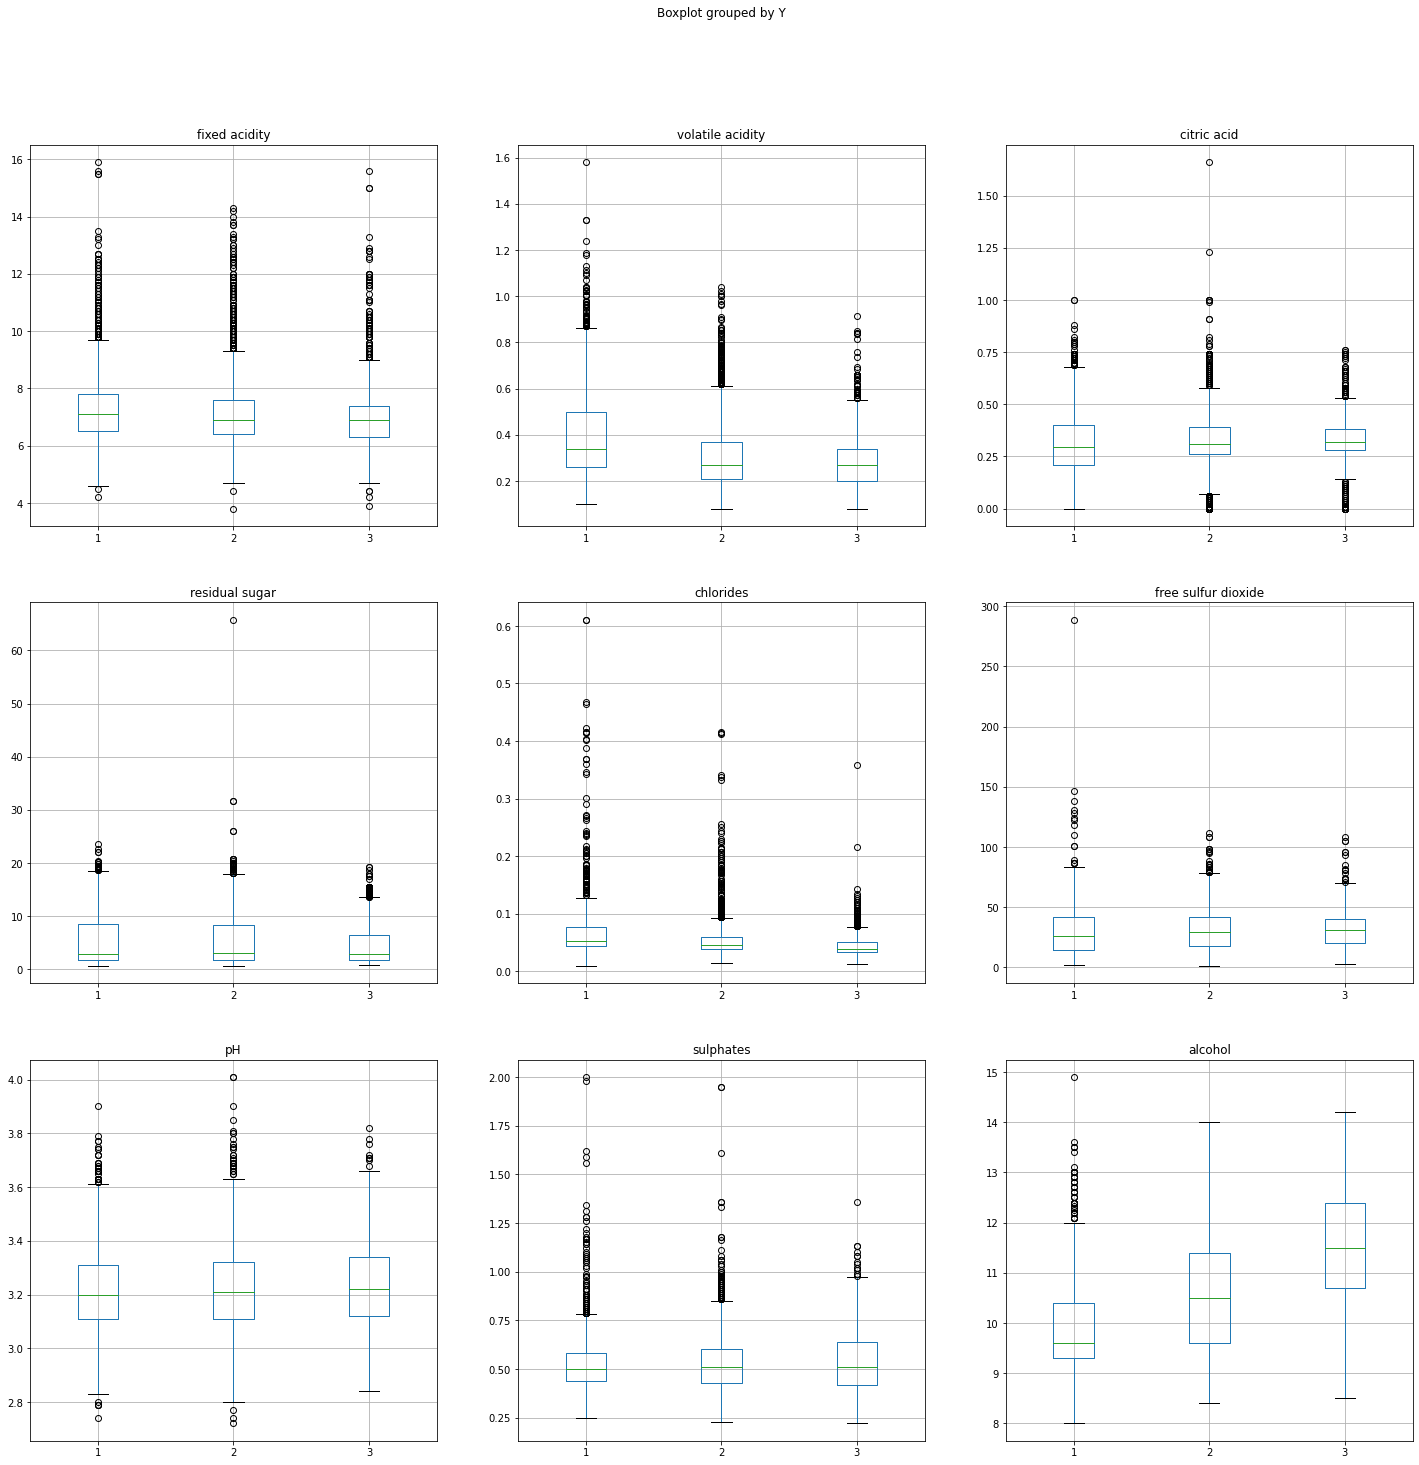

In [70]:
columns=df_red.drop(['Y'],axis=1).columns
fig, axs = plt.subplots(3,3,figsize=(24,24))
i=0
j=0
for col in columns:
    df_red.boxplot(column=[col],by='Y',ax=axs[j,i])
    axs[j,i].set_title(col)
    axs[j,i].set(xlabel='')
    i+=1
    if i==3:
        i=0
        j+=1
    ;

As before, the boxplot can't help us as much as we expected. 

### Models on new problem:

Now we start again to apply the methods. The classes used are the same as before, since we have implemented them with a particoular attention on the fact that they have to work with every number of classes (smaller than 7 for color of the lines in the roc-curves).


# 11. Logistic Regression (3 classes)

In [71]:
lr_model = OneVsRestClassifier(LogisticRegression())
LogRegression3=ModelAnalyzer(lr_model,'Logistic Regression (3 classes)',x_train,x_test,y_train,y_test)

In [72]:
LogRegression3.train_my_model()
random_grid = {'estimator__penalty': ['l1','l2','elasticnet', 'none'], #default l2
               'estimator__C' : np.logspace(-4, 1, 10)}  #default 1

LogRegression3=LogRegression3.hypertune(random_grid)
LogRegression3.print_metrics(targetnames)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.2s


Best params:  {'estimator__C': 0.0001, 'estimator__penalty': 'none'}
Logistic Regression (3 classes) report: 
               precision    recall  f1-score   support

     class 1       0.66      0.53      0.59       787
     class 2       0.50      0.27      0.35       936
     class 3       0.55      0.28      0.37       422

   micro avg       0.58      0.37      0.45      2145
   macro avg       0.57      0.36      0.44      2145
weighted avg       0.57      0.37      0.44      2145
 samples avg       0.34      0.37      0.35      2145



[Parallel(n_jobs=-1)]: Done 113 out of 120 | elapsed:   10.9s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   10.9s finished
/opt/anaconda3/envs/Progetto/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/envs/Progetto/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/envs/Progetto/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/envs/Progetto/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore t

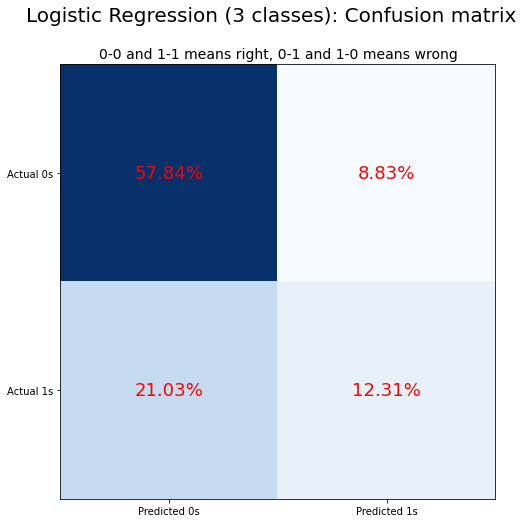

In [73]:
LogRegression3.plot_confusion_matrix()

Micro average AUC score:0.7564


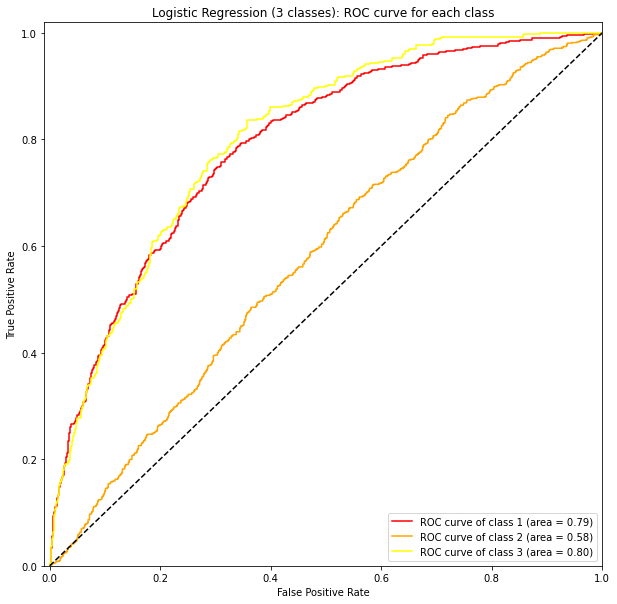

In [74]:
LogRegression3.plot_roc_curve()

# 12. Decision tree (3 classes)

In [75]:
from sklearn.tree import DecisionTreeClassifier
dt_model = OneVsRestClassifier(DecisionTreeClassifier())
DecisionTree3=ModelAnalyzer(dt_model,'Decision Tree (3 classes)',x_train,x_test,y_train,y_test)

In [76]:
DecisionTree3.train_my_model()
random_grid = {'estimator__criterion': ['gini', 'entropy'], #default gini
               'estimator__max_depth': [int(x) for x in np.linspace(40, 80, 15)], #default none
               'estimator__min_samples_split' : [1,2,3,4,5],  #default 2
               'estimator__max_features' : [1,2,3,4,5,6]}  #default sqrt(9)=3

DecisionTree3=DecisionTree3.hypertune(random_grid)
DecisionTree3.print_metrics(targetnames)

Fitting 3 folds for each of 900 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 680 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 1680 tasks      | elapsed:   39.1s
[Parallel(n_jobs=-1)]: Done 2693 out of 2700 | elapsed:  1.1min remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 2700 out of 2700 | elapsed:  1.1min finished


Best params:  {'estimator__criterion': 'entropy', 'estimator__max_depth': 40, 'estimator__max_features': 6, 'estimator__min_samples_split': 2}
Decision Tree (3 classes) report: 
               precision    recall  f1-score   support

     class 1       0.69      0.67      0.68       787
     class 2       0.63      0.63      0.63       936
     class 3       0.57      0.59      0.58       422

   micro avg       0.64      0.64      0.64      2145
   macro avg       0.63      0.63      0.63      2145
weighted avg       0.64      0.64      0.64      2145
 samples avg       0.56      0.64      0.59      2145



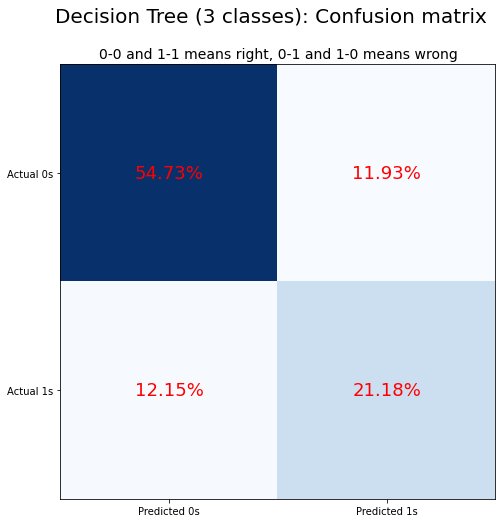

In [77]:
DecisionTree3.plot_confusion_matrix()

Micro average AUC score:0.7282


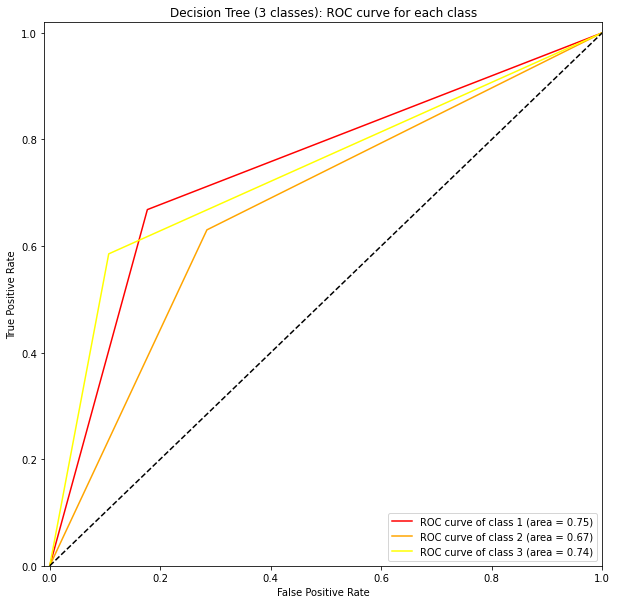

In [78]:
DecisionTree3.plot_roc_curve()

# 13. Random Forest (3 classes)

In [79]:
from sklearn.ensemble import RandomForestClassifier
rf_model=OneVsRestClassifier(RandomForestClassifier())
RandomForest3=ModelAnalyzer(rf_model,'Random Forest (3 classes)',x_train,x_test,y_train,y_test)

In [80]:
RandomForest3.train_my_model()
random_grid = {'estimator__criterion': ['gini', 'entropy'],  #default gini
               'estimator__n_estimators': [int(x) for x in np.linspace(start = 100, stop = 200, num = 5)], #default 100
               'estimator__max_features': [1,3,5], #default 3
               'estimator__max_depth': [int(x) for x in np.linspace(50, 100, 3)], #default none
               'estimator__min_samples_split': [1,2,3,4]} #default 1
#total: 225 combinations
RandomForest3=RandomForest3.hypertune(random_grid)
RandomForest3.print_metrics(targetnames)

Fitting 3 folds for each of 270 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   50.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 17.6min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed: 18.2min finished


Best params:  {'estimator__criterion': 'gini', 'estimator__max_depth': 100, 'estimator__max_features': 5, 'estimator__min_samples_split': 3, 'estimator__n_estimators': 200}
Random Forest (3 classes) report: 
               precision    recall  f1-score   support

     class 1       0.78      0.70      0.74       787
     class 2       0.68      0.65      0.67       936
     class 3       0.76      0.57      0.65       422

   micro avg       0.73      0.65      0.69      2145
   macro avg       0.74      0.64      0.69      2145
weighted avg       0.73      0.65      0.69      2145
 samples avg       0.64      0.65      0.64      2145



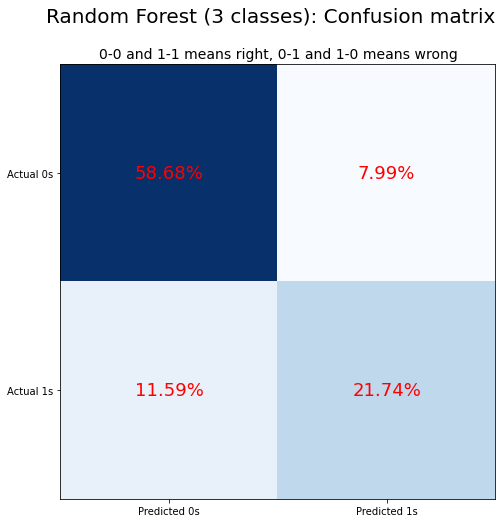

In [81]:
RandomForest3.plot_confusion_matrix()

Micro average AUC score:0.8797


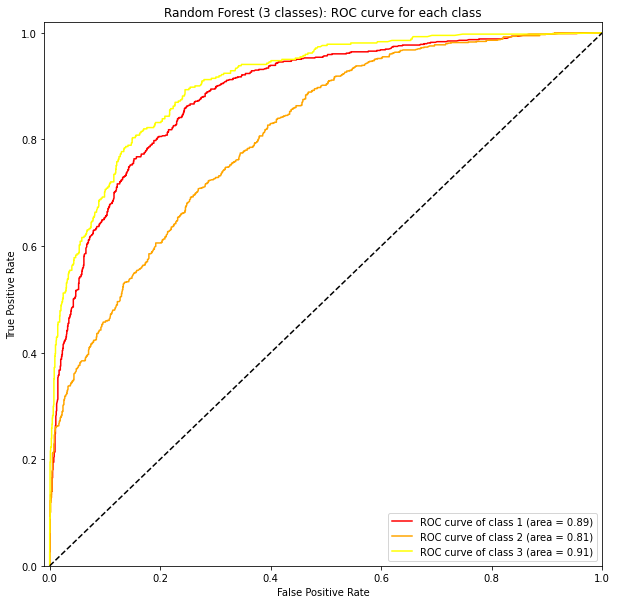

In [82]:
RandomForest3.plot_roc_curve()

# 14. Gradient Boosting (3 classes)

In [83]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = OneVsRestClassifier(GradientBoostingClassifier())
GradientBoosting3=ModelAnalyzer(gb_model,'Gradient Boosting (3 classes)',x_train,x_test,y_train,y_test)

In [84]:
GradientBoosting3.train_my_model()
random_grid = {'estimator__learning_rate' : [np.linspace(0.001, 0.2, 5)], #default .1
               'estimator__n_estimators': [50,75,100,125,150],   #default 100
               'estimator__min_samples_split' : [1,2,3,4,5],  #default 2
              }
GradientBoosting3=GradientBoosting3.hypertune(random_grid)
GradientBoosting3.print_metrics(targetnames)

Fitting 3 folds for each of 125 candidates, totalling 375 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:   34.1s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 375 out of 375 | elapsed:  2.9min finished


Best params:  {'estimator__learning_rate': 0.01, 'estimator__min_samples_split': 2, 'estimator__n_estimators': 150}
Gradient Boosting (3 classes) report: 
               precision    recall  f1-score   support

     class 1       0.69      0.52      0.59       787
     class 2       0.54      0.42      0.47       936
     class 3       0.66      0.13      0.21       422

   micro avg       0.61      0.40      0.48      2145
   macro avg       0.63      0.36      0.43      2145
weighted avg       0.62      0.40      0.47      2145
 samples avg       0.40      0.40      0.40      2145



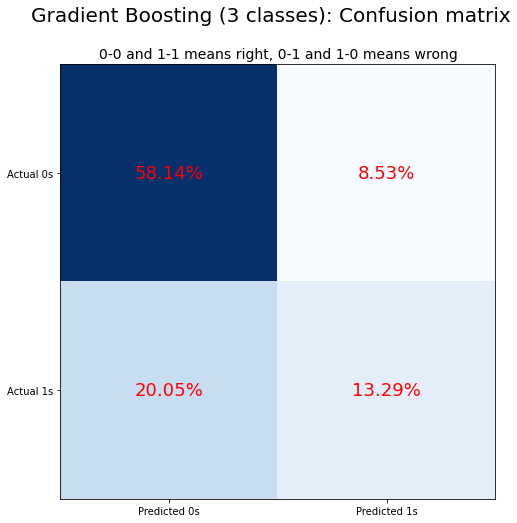

In [85]:
GradientBoosting3.plot_confusion_matrix()

Micro average AUC score:0.7751


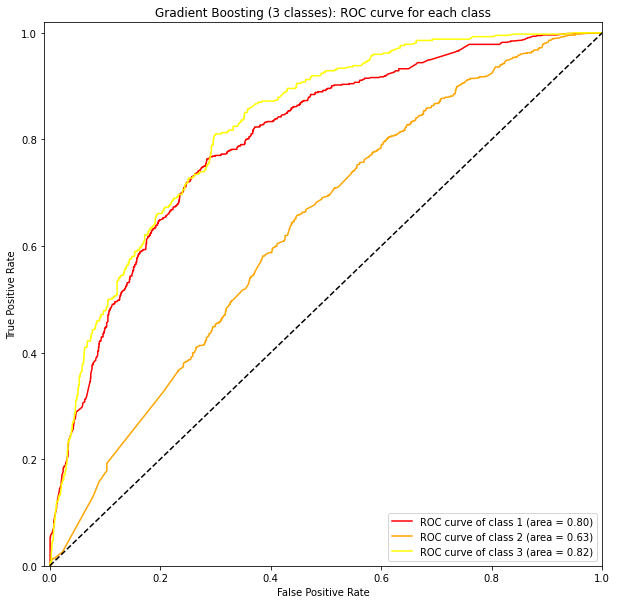

In [86]:
GradientBoosting3.plot_roc_curve()

# 15. Feed Forward  Neural Network (3 classes)

In [87]:
ffw = Sequential()
ffw.add(Dense(500, activation = "relu",input_shape=(9,),kernel_regularizer=l1_l2(.0001)))
ffw.add(Dense(250, activation = "relu",kernel_regularizer=l1_l2(.0001)))
ffw.add(Dense(125, activation = "relu"))
ffw.add(Dense(50, activation = "relu"))
ffw.add(Dropout(.5))
ffw.add(Dense(3, activation="sigmoid"))
ffw.compile(loss="binary_crossentropy", optimizer='Adam', metrics=['accuracy',])

In [88]:
NNet3=NNAnalyzer(ffw,'Feed Forward NN (3 classes)',x_train,x_test,y_train,y_test)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 500)               5000      
_________________________________________________________________
dense_7 (Dense)              (None, 250)               125250    
_________________________________________________________________
dense_8 (Dense)              (None, 125)               31375     
_________________________________________________________________
dense_9 (Dense)              (None, 50)                6300      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 3)                 153       
Total params: 168,078
Trainable params: 168,078
Non-trainable params: 0
________________________________________________

In [89]:
mc = ModelCheckpoint('model_1.h5', monitor='val_loss', mode='min', save_best_only=True, verbose=1)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
NNet3.train_my_model(32,100,es,mc)

Train on 4352 samples, validate on 2145 samples
Epoch 1/100
4352/4352 [==============================] - 6s 1ms/step - loss: 1.4555 - accuracy: 0.6760 - val_loss: 0.5787 - val_accuracy: 0.6963

Epoch 00001: val_loss improved from inf to 0.57866, saving model to model_1.h5
Epoch 2/100
4352/4352 [==============================] - 3s 786us/step - loss: 0.5756 - accuracy: 0.6974 - val_loss: 0.5528 - val_accuracy: 0.7029

Epoch 00002: val_loss improved from 0.57866 to 0.55277, saving model to model_1.h5
Epoch 3/100
4352/4352 [==============================] - 3s 708us/step - loss: 0.5605 - accuracy: 0.6985 - val_loss: 0.5442 - val_accuracy: 0.7145

Epoch 00003: val_loss improved from 0.55277 to 0.54417, saving model to model_1.h5
Epoch 4/100
4352/4352 [==============================] - 3s 740us/step - loss: 0.5486 - accuracy: 0.7027 - val_loss: 0.5428 - val_accuracy: 0.7071

Epoch 00004: val_loss improved from 0.54417 to 0.54279, saving model to model_1.h5
Epoch 5/100
4352/4352 [===========

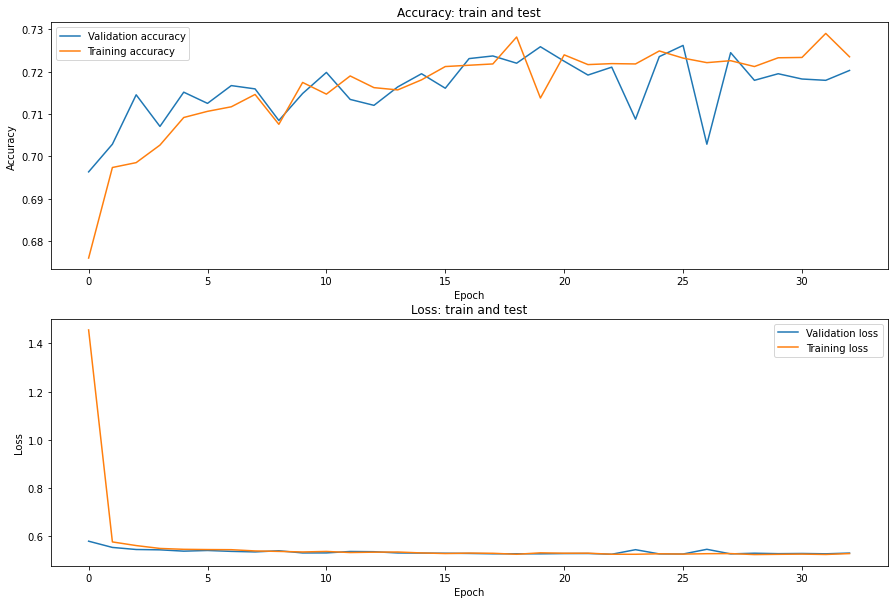

In [90]:
NNet3.plot_model()

In [91]:
NNet3.print_metrics(classes=[0,1,2])

Classification report forFeed Forward NN (3 classes)               precision    recall  f1-score   support

     class 1       0.63      0.72      0.67       787
     class 2       0.53      0.63      0.58       936
     class 3       0.67      0.24      0.35       422

   micro avg       0.58      0.58      0.58      2145
   macro avg       0.61      0.53      0.53      2145
weighted avg       0.60      0.58      0.57      2145
 samples avg       0.58      0.58      0.58      2145



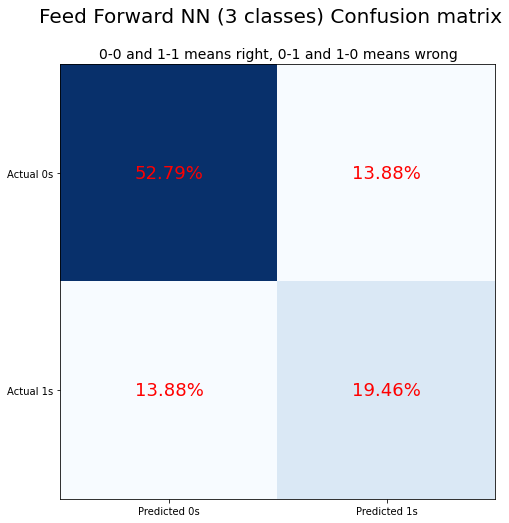

In [92]:
NNet3.plot_confusion_matrix()

Micro average AUC score:0.7764


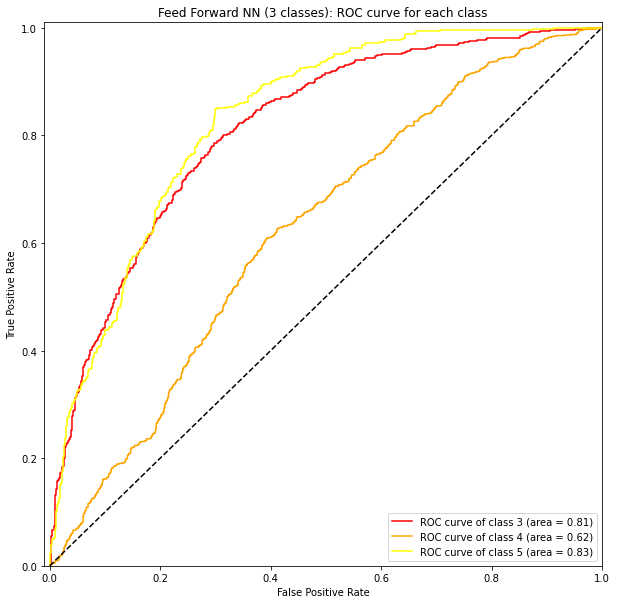

In [93]:
NNet3.plot_roc_curve()

# 16. Model ensembling


This time since the problem is smaller we tried succesfully to implement an ensembled model based on the results of the previous models (we actually used the logistic regression, the random forest and the NN) and working with a logistic regression. It has been really hard and laborious since this was the first time ever for all of us. 

The approach used is the following:
1. build 1 dataframe for each class made of the predicted probabilities obtained in the previous models; extract the respective columns from the target and split everything in train and test set (init def).
2. Fit a logistic model on each of the train set, extract the prediction computed on the test set (only the first column which refers to the probability of the observation to belong to the class) and build a new dataframe, where each row correspond to a test observation and each column is the probability of belongin to one of the 3 classes (log pred, in the model_creator def)
3. Compute the roc curves and the micro roc as for the other models.
4. Print a 3x3 confusion matrix (handmade just for fun) to analyze the results in a business vision.

In [94]:
class LogisticEnsambler:
    
    def __init__(self,models,y_train,y_test):
        self.y_true=y_test
        train1={}
        train2={}
        train3={}
        test1={}
        test2={}
        test3={}
        for mod in models:
            train_probs=mod.model.predict_proba(x_train)
            test_probs=mod.model.predict_proba(x_test)
            train1[mod.model_name]=train_probs[:,0]
            train2[mod.model_name]=train_probs[:,1]
            train3[mod.model_name]=train_probs[:,2]
            test1[mod.model_name]=test_probs[:,0]
            test2[mod.model_name]=test_probs[:,1]
            test3[mod.model_name]=test_probs[:,2]

        self.x_train1=pd.DataFrame(train1)
        self.x_train2=pd.DataFrame(train2)
        self.x_train3=pd.DataFrame(train3)

        self.x_test1=pd.DataFrame(test1)
        self.x_test2=pd.DataFrame(test2)
        self.x_test3=pd.DataFrame(test3)

        self.y_train1=y_train[:,0]
        self.y_train2=y_train[:,1]
        self.y_train3=y_train[:,2]

        self.y_test1=y_test[:,0]
        self.y_test2=y_test[:,1]
        self.y_test3=y_test[:,2]

        print('X_train sets shape: ',self.x_train1.shape)
        print('Y_train sets shape: ',self.y_train1.shape)
        print('X_test sets shape: ',self.x_test1.shape)
        print('Y_test sets shape: ',self.y_test1.shape)
        
    def model_creator(self):
        log_pred={}
        model1 = LogisticRegression().fit(self.x_train1,self.y_train1)
        log_pred['one']=model1.predict_proba(self.x_test1)[:,1]
        model2 = LogisticRegression().fit(self.x_train2,self.y_train2)
        log_pred['two']=model2.predict_proba(self.x_test2)[:,1]
        model3 = LogisticRegression().fit(self.x_train3,self.y_train3)
        log_pred['three']=model3.predict_proba(self.x_test3)[:,1]
        
        print('Model 1 accuracy: ',model1.score(self.x_test1,self.y_test1))
        print('Model 2 accuracy: ',model2.score(self.x_test2,self.y_test2))
        print('Model 3 accuracy: ',model3.score(self.x_test3,self.y_test3))
        self.log_pred=pd.DataFrame(log_pred).values
        
    def plot_roc_curve(self):
        fpr_micro,tpr_micro, _ = roc_curve(self.y_true.ravel(), self.log_pred.ravel())
        auc_micro = auc(fpr_micro, tpr_micro)
        print('Micro AUC score: ',auc_micro)
        
        fpr_compare['Ensemble model']=fpr_micro
        tpr_compare['Ensemble model']=tpr_micro
        auc_compare['Ensemble model']=auc_micro
        
        targetnames=['class {0:.0f}'.format(x) for x in range(1,4)]
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(3):
            fpr[i], tpr[i], _ = roc_curve(self.y_true[:, i], self.log_pred[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        plt.figure(figsize=[10,10])
        colors = ['red','green','purple']
        for i, color in zip(range(3), colors):
            plt.plot(fpr[i], tpr[i], color=color,
                     label='ROC curve of {0} (area = {1:0.2f})'
                     ''.format(targetnames[i], roc_auc[i]))

        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([-0.01, 1.0])
        plt.ylim([0.0, 1.02])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Ensamble: ROC curve for each class')
        plt.legend(loc="lower right")
        plt.show()
        
    def metrics(self):
        y_list=[]
        for row in y_test:
            max_row=np.argmax(row)
            if max_row==0:
                y_list.append(0)
            elif max_row==1:
                y_list.append(1)
            else:
                y_list.append(2)  

        errors={
            'bad wines':{
                'bad':0,
                'medium':0,
                'good':0
            },
            'medium wines':{
                'bad':0,
                'medium':0,
                'good':0        
            },
            'good wines':{
                'bad':0,
                'medium':0,
                'good':0        
            },
        }

        for i in range(len(y_list)):
            predicted=np.argmax(self.log_pred[i])
            target=y_list[i]
            if target==0 and predicted==0:
                errors['bad wines']['bad']+=1
            elif target ==0 and predicted==1:
                errors['bad wines']['medium']+=1
            elif target ==0 and predicted==2:
                errors['bad wines']['good']+=1
            elif target ==1 and predicted==0:
                errors['medium wines']['bad']+=1
            elif target ==1 and predicted==1:
                errors['medium wines']['medium']+=1
            elif target ==1 and predicted==2:
                errors['medium wines']['good']+=1
            elif target ==2 and predicted==0:
                errors['good wines']['bad']+=1
            elif target ==2 and predicted==1:
                errors['good wines']['medium']+=1
            elif target ==2 and predicted==2:
                errors['good wines']['good']+=1        
        
        errors=pd.DataFrame(errors)/len(y_list)
        return errors

In [120]:
models=[LogRegression3,
    RandomForest3,
    NNet3
]
my_ens=LogisticEnsambler(models,y_train,y_test)

X_train sets shape:  (4352, 3)
Y_train sets shape:  (4352,)
X_test sets shape:  (2145, 3)
Y_test sets shape:  (2145,)


In [121]:
my_ens.model_creator()

Model 1 accuracy:  0.8158508158508159
Model 2 accuracy:  0.7174825174825175
Model 3 accuracy:  0.8783216783216783


Micro AUC score:  0.8790885726550063


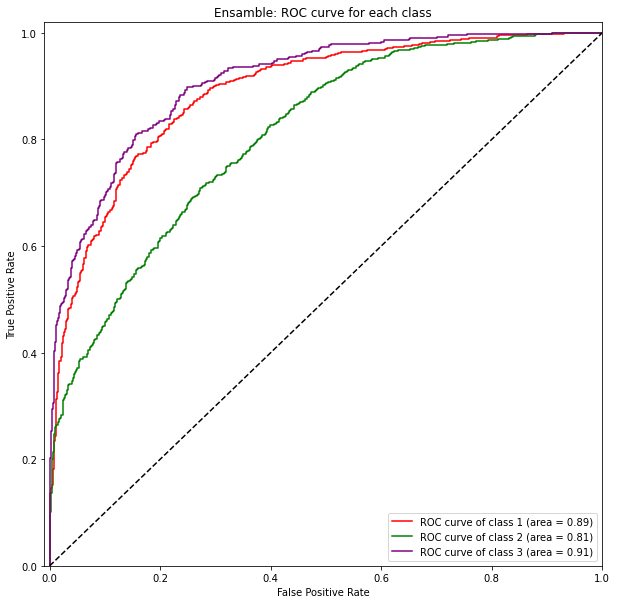

In [122]:
my_ens.plot_roc_curve()

In [123]:
my_ens.metrics()

,bad wines,medium wines,good wines
bad,0.267133,0.079720,0.006993
medium,0.090909,0.315152,0.072261
good,0.008858,0.041492,0.117483


# 17. Model comparison (3 classes)


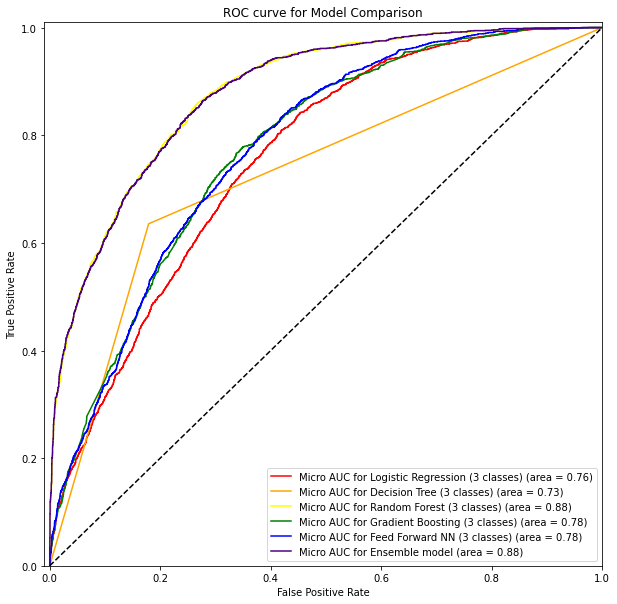

In [124]:
model_comparison()

The plot is really interesting. At first, we can say that the most performing models are the ensembled and the Random Forest, which gained similar performances. 
Regarding the other models, they are not as good as this and are 10 percentage points below the bests.

# 18. Conclusions

## Business insight

#### Is the model usable?
The results of the model are clear: we are able to detect the quality of wine pretty good, moreover if we consider the fact that the errors are never bad (2 classes jump).

#### Who is the customer?
To answer we need to specify that ,in italy, is not mandatory to make wine chemical analysis public. Assuming this, let's assume the client is a producer or a wine merchant.

#### Which is the target market?
In italy the wine market works without a direct relationship between price and quality. This is due to the fact that in our country we have a lot of different productors, grapes types and ecosystems. But that's not true worldwide.

As example, in the USA is proved that the wine price is directly correlated with is quality. As the quality improve, the wine become more expensive. And because of this our target market is the USA!

The sources are not 100% secure (we are not able to find any proof on the web) but Mauro personally asked to an expert who confirmed that.

#### How can the customer use the model?
If the assumptions hold (usa market, producer=customer) we can say that the model is reliable for pricing wines. Given the market medium quality, the customer can evaluate his wine and take the result as a starting point for choosing the price of his bottles. 



## Improvement

During the work we found out some missing variables on the dataset.
Let's think about a bottle of wine. 
* The first thing you want to know for evaluat its quality without tasting it should be the area of production. It's very likely that if the area is Montalcino the quality is really high, while if it produced in Valle d'Aosta the probability of having a high qualty wine is smaller.
* The second thing i usually check is the certificate; if the bottle is DOCG the probability that the quality is good is really high! You just have to know that for gaining a DOCG certificate, after respecting all the methodologies a commission have to test the wine and accept it.
* The third think i check is the year of enbottlement. An old wine, if good, is very good! As the bottle get's older it increase it's value (and maybe the quality).

The conclusions are as follows: inserting the mentioned variables will probably increase the accuracy of the algorithm. However, we need to consider that wine is wine: anyone can say if the quality is high just looking at its statistics. Consider for a while the history of the Sassicaia, one the most famous and top rated italians wine:it is born as a table wine in the 80's, low priced and without any aspiration. Now an aged bottle can reach 3'000€ of price easily. no one could have expected this. Wine is wine.


## Working method:
At first we wanted to implement an agile method, but it doesn't work at all. Nonetheless, we followed these steps:
1. work division: coding, theory and presentation (3 couples).
2. brain storming for data visualization and first coding steps toghether.
3. Work in couple until friday: this was the last day for finishing the biggest part of the work.
4. Work toghether during the weekend to check everything.
5. Presentation.